In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import pandas as pd

In [2]:
data_400 = './Zn_data/03112020_MnO2_RDE_50mVs_400rpm_ExtendedBounds_120mL_counter_C04_C03.txt'
data_2500 = './Zn_data/03112020_MnO2_RDE_50mVs_2500rpm_ExtendedBounds_120mL_counter_C04_C03.txt'

In [3]:
rpm400 = pd.read_csv(data_400,sep='\t',header=(56),usecols=range(12)) 
rpm2500 = pd.read_csv(data_2500,sep='\t',header=(54),usecols=range(12)) 

In [4]:
data = rpm2500
data

,mode,oxred,error,control changes,counter inc.,times,controlV,EweV,ImA,cycle number,(Q-Qo)C,EceV
0,2,1,0,0,0,0.00000,-0.997045,-0.997340,-0.096882,1.0,0.000000,-0.219662
1,2,1,0,0,0,0.01100,-0.996496,-0.996849,-0.094365,1.0,-0.000001,-0.188104
2,2,1,0,0,0,0.03100,-0.995495,-0.995874,-0.090786,1.0,-0.000003,-0.133990
3,2,1,0,0,0,0.05100,-0.994495,-0.994832,-0.088282,1.0,-0.000005,-0.085933
4,2,1,0,0,0,0.07100,-0.993495,-0.993827,-0.086412,1.0,-0.000006,-0.042983
...,...,...,...,...,...,...,...,...,...,...,...,...
19173,2,1,0,1,1,383.89439,-1.002197,-1.002537,-0.067682,3.0,-0.018924,-0.016995
19174,2,1,0,1,1,383.91439,-1.001197,-1.001559,-0.067415,3.0,-0.018925,-0.020622
19175,2,1,0,1,1,383.93039,-1.000396,-1.000749,-0.067207,3.0,-0.018926,-0.022879
19176,2,1,0,1,1,383.93739,-1.000046,-1.000413,-0.067078,3.0,-0.018927,-0.023613


In [5]:
Ece = np.array(data['EceV'])
Current = np.array(data['ImA'])
cycles = data['cycle number']
time = data['times']

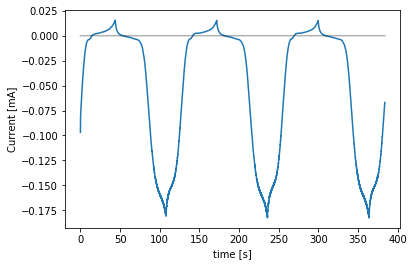

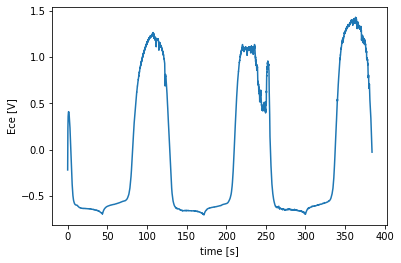

In [6]:
plt.plot(time, Current)
plt.plot(time,np.zeros_like(time),'k',alpha=0.3)
plt.ylabel('Current [mA]')
plt.xlabel('time [s]')
plt.show()

plt.plot(time,Ece)
plt.ylabel('Ece [V]')
plt.xlabel('time [s]')
plt.show()

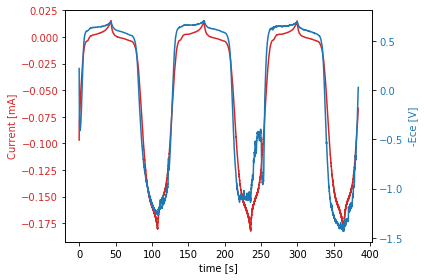

In [7]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time [s]')
ax1.set_ylabel('Current [mA]', color=color)
ax1.plot(time, Current,color=color)
# ax1.plot(times,Power_demands, '*',color='tab:grey',label = 'Power Demand (kW)')
ax1.tick_params(axis='y', labelcolor=color)
# plt.legend(loc = 'upper center')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('-Ece [V]', color=color)  # we already handled the x-label with ax1
ax2.plot(time,(-1)*np.array(Ece), '-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [8]:
#Looking for equilibrium voltage
ocvs = []
small_currents = []
print('{:9s} {:17s} {:14s}'.format('time[s]','current [mA]','V'))
for l in range(len(Current)):
    if abs(Current[l]) < 1e-5: #when current ~0
        print('{:5.1f} {:12.1e} {:12.3f}'.format(time[l],Current[l],Ece[l]))
        value = Ece[l] 
        ocvs.append(value)
        small_currents.append(Current[l])
            
# equil_potential = np.average(ocvs)
# min_index = np.argmin(abs(np.array(small_currents)))
min_index = -1
equil_potential = ocvs[min_index] #the voltage that corresponds to the smallest value for current in cycle 3
equil_potential

time[s]   current [mA]      V             
 14.5      8.5e-06       -0.624
 53.2      1.9e-06       -0.603
 53.2     -8.2e-07       -0.603
 53.3     -5.4e-06       -0.602
181.4      1.2e-06       -0.626
181.5     -6.5e-06       -0.625
269.6      4.4e-06       -0.643
309.4      2.1e-06       -0.613
309.4     -1.2e-06       -0.613
309.4     -4.9e-06       -0.613
309.4      6.5e-06       -0.612
309.5     -9.6e-06       -0.612


-0.61229473

In [9]:
E_cycle1 = []
E_cycle2 = []
E_cycle3 = []
E_cycle4 = []

I_cycle1 = []
I_cycle2 = []
I_cycle3 = []
I_cycle4 = []

for m in range(len(cycles)):
    if cycles[m] == 1:
        E_cycle1.append(Ece[m])
        I_cycle1.append(Current[m])
    elif cycles[m] == 2:
        E_cycle2.append(Ece[m])
        I_cycle2.append(Current[m])
    elif cycles[m] == 3:
        E_cycle3.append(Ece[m])
        I_cycle3.append(Current[m])
    elif cycles[m] == 4:
        E_cycle4.append(Ece[m])
        I_cycle4.append(Current[m])

print(len(E_cycle1), len(E_cycle2), len(E_cycle3), len(E_cycle4))
print('cycles are different lengths- be aware when trying to compare')

6390 6393 6395 0
cycles are different lengths- be aware when trying to compare


Text(0.5, 0, 'Abs. Value of Current [mA]')

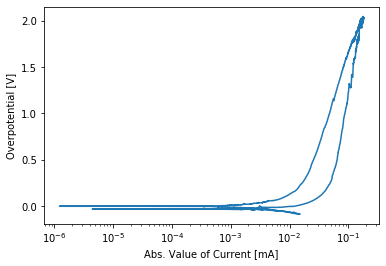

In [10]:
overpotentials = np.array(E_cycle3) - equil_potential
overpotentials

fig, ax = plt.subplots()
# ax.set_xscale('log', basex=np.e)
ax.set_xscale('log', basex=10)
plt.plot(abs(np.array(I_cycle3)),overpotentials)
plt.ylabel('Overpotential [V]')
plt.xlabel('Abs. Value of Current [mA]')

For cycle 3

In [11]:
equil_potential

-0.61229473

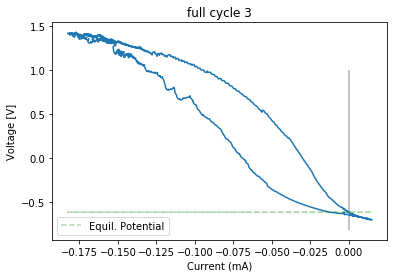

In [12]:
plt.plot(I_cycle3,np.array(E_cycle3))
plt.plot(I_cycle3,np.ones_like(I_cycle3)*equil_potential,'--g',label = 'Equil. Potential',alpha=.3)
plt.ylabel('Voltage [V]')
plt.xlabel('Current (mA)')
plt.title('full cycle 3')
plt.vlines(0,equil_potential-.2,1,alpha=.3)
plt.legend(loc='lower left')
plt.show()

In [13]:
equil_potential - min(E_cycle3) + equil_potential
max(I_cycle3)

0.01509182554270541

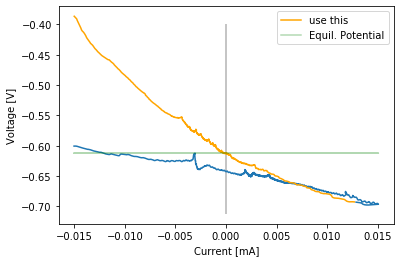

<function matplotlib.pyplot.show(*args, **kw)>

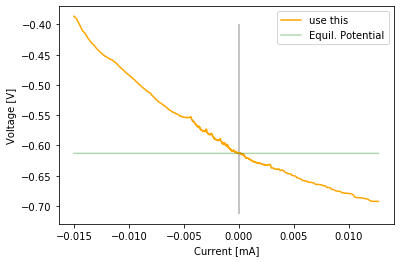

In [14]:
good_V = []
good_I = []

for i in range(len(E_cycle3)):
#     if E_cycle3[i]<-.42 and E_cycle3[i]>min(E_cycle3):
    if I_cycle3[i]<max(I_cycle3) and I_cycle3[i]>-max(I_cycle3):
        good_V.append(E_cycle3[i])
        good_I.append(I_cycle3[i])

h = int(len(good_I)/1.9)
plt.plot(good_I[0:h],good_V[0:h])
plt.plot(good_I[h:],good_V[h:], 'orange',label = 'use this')
plt.plot(good_I,np.ones_like(good_I)*equil_potential,'g',label = 'Equil. Potential',alpha=.3)
plt.vlines(0,equil_potential-.1,-.4,alpha=.3)
plt.ylabel('Voltage [V]')
plt.xlabel('Current [mA]')
plt.legend()
plt.show()
use_V = good_V[h:]
use_I = good_I[h:]

min_index = np.argmin(abs(np.array(use_I)))
equil_potential = use_V[min_index]
use_V[min_index],use_I[min_index]
equil_potential

#just the values we want 
plt.plot(good_I[h:],good_V[h:], 'orange',label = 'use this')
plt.plot(good_I[h:],np.ones_like(good_I[h:])*equil_potential,'g',label = 'Equil. Potential',alpha=.3)
plt.vlines(0,equil_potential-.1,-.4,alpha=.3)
plt.ylabel('Voltage [V]')
plt.xlabel('Current [mA]')
plt.legend()
plt.show

In [15]:
# plt.plot(np.array(use_v),use_current_densities)
# plt.plot(use_v,np.zeros_like(use_v))
# plt.xlabel('Voltage (V)')
# plt.ylabel('Current density (mA/m^2)')
# plt.show()

def BV(E_cell, j0, aa, ac):
    '''
    takes in cell potential [V] + parameters:j0 [A/m^2],aa,ac
    returns current DENSITY [A/m^2]
    '''
    F = 96485.33212 #C/mol
    R = 8.314 #J/mol-K
    T = 293 #K
#     equil_voltage = 0.5507 #V
#     equil_voltage = 0.3 #V

    #The equil_voltage = cell voltage when current = 0 for cycle 3
    equil_voltage = equil_potential #from above
    overpotential = E_cell - equil_voltage
    z = 2
    
    j = j0*(np.exp(aa*z*F*overpotential*(R*T)**(-1))-np.exp(-ac*z*F*overpotential*(R*T)**(-1)))
    
    return j

### Testing with 1 cycle:

In [16]:
diam_mm = 3 #mm. Diam of RDE used for this experimental data
D = diam_mm/1000
A = np.pi*D**2/4 #m^2
A

7.068583470577034e-06

In [17]:
length = 20
use_current_densities = np.array(use_I)/A/1000 #A/m^2
print('Max current is {:.1f} amps\nMin current is {:.1f} amps'.format(max(use_current_densities),min(use_current_densities)))
j0_guesses = np.linspace(min(use_current_densities),max(use_current_densities),length)
aa0_guesses = np.linspace(0.001,.87,len(j0_guesses))
ac0_guesses = np.linspace(0.003,.9,len(j0_guesses))

#matrix of all combinations of these guesses:
p0s = np.array(np.meshgrid(j0_guesses,aa0_guesses,ac0_guesses)).T.reshape(-1,3)

np.shape(p0s)

Max current is 1.8 amps
Min current is -2.1 amps


(8000, 3)

### Testing with 1 guess

In [18]:
# ans = curve_fit(BV,use_v,use_current_densities,[.5,.5,.5],bounds=([-np.inf,0,0],[np.inf,2,2]),maxfev=4000)
ans = curve_fit(BV,use_V,use_current_densities,[.5,.5,.5],maxfev=4000)
j0_fit, aa_fit, ac_fit = ans[0]
print('j0,aa,ac:', j0_fit, aa_fit, ac_fit)
pcov = ans[1]
perr = np.sqrt(np.diag(pcov))
print('errors:',perr)
print('errors r this % of values:',perr/ans[0]*100 )

j0,aa,ac: -0.827929523759235 0.05900931704273116 0.1665589297594861
errors: [0.00849854 0.00072277 0.00139438]
errors r this % of values: [-1.02648079  1.22483642  0.83716839]


In [19]:
identified_js = []
identified_aas = []
identified_acs = []

for m in range(len(p0s)):
    try: 
        anss = curve_fit(BV,use_V,use_current_densities,p0s[m])
#         anss = curve_fit(BV,use_V,use_I,p0s[m],maxfev=8000)
        gs = anss[0] 
        
        alphas_are_positive = gs[1]>0 and gs[2]>0
        j0_not_zero = abs(gs[0])>1e-4
#         j0_not_zero = True
        different_from_guess = abs(gs[0]-p0s[m,0])>1e-2 and abs(gs[1]-p0s[m,1])>1e-3 and abs(gs[2]-p0s[m,2])>1e-3 
#         different_from_guess = gs[0] - p0s[m,0] !=0 and gs[1]-p0s[m,1]!=0  and gs[2]-p0s[m,2]!=0  
        alphas_big = gs[1]>0.1 and gs[2]>0.1
        a_sum = gs[1] + gs[2]
        one_ish = a_sum < 1.2 and a_sum<.8
        
        if alphas_are_positive and different_from_guess and j0_not_zero:
            print('guess:',p0s[m],'\ngenerated:',anss[0],'\nerrors:',np.sqrt(np.diag(anss[1])),'\n')
            identified_js.append(gs[0])
            identified_aas.append(gs[1])
            print('aa: {:.4f}'.format(gs[1]))
            identified_acs.append(gs[2])
            print('ac: {:.4f}'.format(gs[2]))
#             
    except RuntimeError:
        print('runtime error\n')


guess: [-2.12432422e+00  1.00000000e-03  3.00000000e-03] 
generated: [-0.82792932  0.05900934  0.16655894] 
errors: [0.00849911 0.00072279 0.0013944 ] 

aa: 0.0590
ac: 0.1666
guess: [-2.12432422  0.04673684  0.003     ] 
generated: [-0.82792963  0.05900931  0.16655891] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-2.12432422  0.09247368  0.003     ] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-2.12432422  0.13821053  0.003     ] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-2.12432422  0.18394737  0.003     ] 
generated: [-0.82792954  0.05900932  0.16655893] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-2.12432422  0.22968421  0.003     ] 
generated: [-0.82792944  0.05900932  0.16655895] 
errors: [0.0084984  0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-2

guess: [-1.71152922  0.59557895  0.003     ] 
generated: [-0.82792988  0.05900928  0.16655888] 
errors: [0.00849825 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.64131579  0.003     ] 
generated: [-0.82792995  0.05900928  0.16655888] 
errors: [0.00849817 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.68705263  0.003     ] 
generated: [-0.82792998  0.05900927  0.16655887] 
errors: [0.00849817 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.73278947  0.003     ] 
generated: [-0.82792963  0.05900931  0.16655892] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.77852632  0.003     ] 
generated: [-0.82792968  0.05900931  0.1665589 ] 
errors: [0.00849874 0.00072277 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.82426316  0.003     ] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0

guess: [-1.09233673  0.36689474  0.003     ] 
generated: [-0.82792959  0.05900931  0.16655892] 
errors: [0.00849846 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.41263158  0.003     ] 
generated: [-0.82792952  0.05900932  0.16655893] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.45836842  0.003     ] 
generated: [-0.82792918  0.05900934  0.16655899] 
errors: [0.00849841 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.50410526  0.003     ] 
generated: [-0.82792955  0.05900931  0.16655893] 
errors: [0.00849853 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.54984211  0.003     ] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.59557895  0.003     ] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0

guess: [-0.47314424  0.001       0.003     ] 
generated: [-0.82792968  0.0590093   0.16655891] 
errors: [0.00849846 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.04673684  0.003     ] 
generated: [-0.82792935  0.05900933  0.16655896] 
errors: [0.00849839 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.09247368  0.003     ] 
generated: [-0.82792949  0.05900932  0.16655894] 
errors: [0.00849853 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.13821053  0.003     ] 
generated: [-0.82792976  0.05900929  0.1665589 ] 
errors: [0.00849837 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.18394737  0.003     ] 
generated: [-0.82792921  0.05900934  0.16655899] 
errors: [0.00849824 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.22968421  0.003     ] 
generated: [-0.82792948  0.05900932  0.16655893] 
errors: [0.00849857 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0

ac: 0.1666
guess: [-0.06034925  0.82426316  0.003     ] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.06034925  0.87        0.003     ] 
generated: [-0.82792985  0.05900928  0.1665589 ] 
errors: [0.00849811 0.00072275 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.14604825 0.59557895 0.003     ] 
generated: [-0.82792973  0.0590093   0.1665589 ] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.14604825 0.64131579 0.003     ] 
generated: [-0.8279298   0.05900929  0.16655889] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.73278947 0.003     ] 
generated: [-0.82793017  0.05900926  0.16655884] 
errors: [0.00849822 0.00072275 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.77852632 0.003     ] 
generated: [-0.82792952  0.05900932  0.16655893] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.82

guess: [1.59083073 0.27542105 0.003     ] 
generated: [-0.82792986  0.05900929  0.16655888] 
errors: [0.00849842 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.32115789 0.003     ] 
generated: [-0.82792965  0.05900931  0.16655891] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.36689474 0.003     ] 
generated: [-0.82792946  0.05900932  0.16655895] 
errors: [0.00849842 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.41263158 0.003     ] 
generated: [-0.82792913  0.05900935  0.16655901] 
errors: [0.00849823 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.45836842 0.003     ] 
generated: [-0.82792955  0.05900931  0.16655893] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.50410526 0.003     ] 
generated: [-0.82792939  0.05900932  0.16655899] 
errors: [0.00849772 0.00072274 0.00139435] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.54984211 0.003     

guess: [-1.91792672  0.87        0.05021053] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922e+00  1.00000000e-03  5.02105263e-02] 
generated: [-0.82792987  0.05900928  0.16655889] 
errors: [0.00849825 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.04673684  0.05021053] 
generated: [-0.82792965  0.05900931  0.16655891] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.09247368  0.05021053] 
generated: [-0.8279295   0.05900932  0.16655893] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.13821053  0.05021053] 
generated: [-0.82792917  0.05900935  0.16655897] 
errors: [0.00849889 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.18394737  0.05021053] 
generated: [-0.82792942  0.05900932  0.16655895] 
errors: [0.00849839 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1

guess: [-1.09233673e+00  1.00000000e-03  5.02105263e-02] 
generated: [-0.82792967  0.0590093   0.16655891] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.04673684  0.05021053] 
generated: [-0.82792949  0.05900932  0.16655893] 
errors: [0.00849874 0.00072277 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.09247368  0.05021053] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.13821053  0.05021053] 
generated: [-0.82792875  0.05900938  0.16655906] 
errors: [0.00849847 0.00072277 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.18394737  0.05021053] 
generated: [-0.82792928  0.05900933  0.16655898] 
errors: [0.00849828 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.22968421  0.05021053] 
generated: [-0.82792929  0.05900933  0.16655898] 
errors: [0.00849835 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1

ac: 0.1666
guess: [-0.47314424  0.001       0.05021053] 
generated: [-0.82792956  0.05900932  0.16655892] 
errors: [0.0084986  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.04673684  0.05021053] 
generated: [-0.82792955  0.05900931  0.16655893] 
errors: [0.00849846 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.09247368  0.05021053] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849857 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.13821053  0.05021053] 
generated: [-0.8279296   0.05900931  0.16655892] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.18394737  0.05021053] 
generated: [-0.82792946  0.05900932  0.16655895] 
errors: [0.00849842 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.22968421  0.05021053] 
generated: [-0.82792966  0.0590093   0.16655891] 
errors: [0.00849844 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.

guess: [0.14604825 0.64131579 0.05021053] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.14604825 0.87       0.05021053] 
generated: [-0.82792922  0.05900935  0.16655897] 
errors: [0.00849871 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.50410526 0.05021053] 
generated: [-0.82792957  0.05900932  0.16655891] 
errors: [0.00849886 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.54984211 0.05021053] 
generated: [-0.82792952  0.05900932  0.16655892] 
errors: [0.00849867 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.59557895 0.05021053] 
generated: [-0.82792952  0.05900932  0.16655893] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.64131579 0.05021053] 
generated: [-0.82792946  0.05900932  0.16655894] 
errors: [0.00849843 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.68705263 0.05021053

guess: [0.97163824 0.68705263 0.05021053] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.73278947 0.05021053] 
generated: [-0.82792883  0.05900937  0.16655906] 
errors: [0.00849815 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.77852632 0.05021053] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.82426316 0.05021053] 
generated: [-0.82792943  0.05900932  0.16655895] 
errors: [0.00849844 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.87       0.05021053] 
generated: [-0.82792975  0.0590093   0.16655889] 
errors: [0.00849868 0.00072277 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.13821053 0.05021053] 
generated: [-0.82792954  0.05900932  0.16655892] 
errors: [0.00849858 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.18394737 0.05021053

guess: [1.59083073 0.77852632 0.05021053] 
generated: [-0.82792979  0.05900929  0.1665589 ] 
errors: [0.00849834 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.82426316 0.05021053] 
generated: [-0.82792963  0.05900931  0.16655892] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.87       0.05021053] 
generated: [-0.82792969  0.0590093   0.16655891] 
errors: [0.00849842 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.13821053 0.05021053] 
generated: [-0.82792964  0.05900931  0.16655891] 
errors: [0.00849845 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.18394737 0.05021053] 
generated: [-0.8279295   0.05900932  0.16655894] 
errors: [0.00849843 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.22968421 0.05021053] 
generated: [-0.82792955  0.05900931  0.16655892] 
errors: [0.00849854 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.27542105 0.05021053

guess: [-1.91792672  0.77852632  0.09742105] 
generated: [-0.82792915  0.05900935  0.16655899] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.82426316  0.09742105] 
generated: [-0.82792959  0.05900931  0.16655892] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.87        0.09742105] 
generated: [-0.82792927  0.05900935  0.16655894] 
errors: [0.00849916 0.00072279 0.0013944 ] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922e+00  1.00000000e-03  9.74210526e-02] 
generated: [-0.82792968  0.0590093   0.16655891] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.04673684  0.09742105] 
generated: [-0.82792968  0.0590093   0.16655891] 
errors: [0.00849846 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.09247368  0.09742105] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849846 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1

guess: [-1.09233673  0.04673684  0.09742105] 
generated: [-0.82792964  0.05900931  0.16655891] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.09247368  0.09742105] 
generated: [-0.82792962  0.05900931  0.16655891] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.13821053  0.09742105] 
generated: [-0.82792971  0.0590093   0.16655891] 
errors: [0.00849837 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.18394737  0.09742105] 
generated: [-0.82792948  0.05900932  0.16655893] 
errors: [0.00849866 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.22968421  0.09742105] 
generated: [-0.82792951  0.05900932  0.16655893] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.27542105  0.09742105] 
generated: [-0.82792953  0.05900932  0.16655893] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0

guess: [-0.47314424  0.13821053  0.09742105] 
generated: [-0.8279295   0.05900932  0.16655894] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.18394737  0.09742105] 
generated: [-0.82792964  0.05900931  0.16655891] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.22968421  0.09742105] 
generated: [-0.8279295   0.05900932  0.16655893] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.27542105  0.09742105] 
generated: [-0.8279293   0.05900933  0.16655897] 
errors: [0.00849846 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.32115789  0.09742105] 
generated: [-0.82792948  0.05900932  0.16655894] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.36689474  0.09742105] 
generated: [-0.82792979  0.05900929  0.16655889] 
errors: [0.00849853 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0

guess: [0.14604825 0.68705263 0.09742105] 
generated: [-0.8279295   0.05900932  0.16655894] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.14604825 0.82426316 0.09742105] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.13821053 0.09742105] 
generated: [-0.82792982  0.05900929  0.16655888] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.18394737 0.09742105] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.22968421 0.09742105] 
generated: [-0.82792962  0.05900931  0.16655891] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.41263158 0.09742105] 
generated: [-0.82792873  0.05900939  0.16655904] 
errors: [0.00849883 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.45836842 0.09742105

guess: [0.97163824 0.73278947 0.09742105] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849853 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.77852632 0.09742105] 
generated: [-0.82792967  0.0590093   0.16655891] 
errors: [0.00849845 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.82426316 0.09742105] 
generated: [-0.82792969  0.0590093   0.16655891] 
errors: [0.00849843 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.87       0.09742105] 
generated: [-0.82792953  0.05900932  0.16655893] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.04673684 0.09742105] 
generated: [-0.82792934  0.05900933  0.16655896] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.09247368 0.09742105] 
generated: [-0.82792917  0.05900935  0.16655898] 
errors: [0.00849861 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.13821053 0.09742105

guess: [1.59083073 0.82426316 0.09742105] 
generated: [-0.82792955  0.05900931  0.16655893] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.87       0.09742105] 
generated: [-0.82792956  0.05900931  0.16655893] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.04673684 0.09742105] 
generated: [-0.82793004  0.05900927  0.16655885] 
errors: [0.00849847 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.09247368 0.09742105] 
generated: [-0.8279295   0.05900932  0.16655894] 
errors: [0.00849841 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.13821053 0.09742105] 
generated: [-0.82792944  0.05900932  0.16655894] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.18394737 0.09742105] 
generated: [-0.82792957  0.0590093   0.16655896] 
errors: [0.00849762 0.00072274 0.00139435] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.22968421 0.09742105

guess: [-1.71152922  0.09247368  0.14463158] 
generated: [-0.82792966  0.05900931  0.1665589 ] 
errors: [0.00849883 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.13821053  0.14463158] 
generated: [-0.82793023  0.05900925  0.16655884] 
errors: [0.00849793 0.00072275 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.18394737  0.14463158] 
generated: [-0.82792949  0.05900932  0.16655893] 
errors: [0.00849862 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.22968421  0.14463158] 
generated: [-0.8279295   0.05900932  0.16655893] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.27542105  0.14463158] 
generated: [-0.82792954  0.05900931  0.16655893] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.32115789  0.14463158] 
generated: [-0.82792923  0.05900934  0.16655898] 
errors: [0.00849853 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0

guess: [-1.09233673  0.45836842  0.14463158] 
generated: [-0.82792909  0.05900936  0.16655899] 
errors: [0.00849879 0.00072278 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.50410526  0.14463158] 
generated: [-0.82792956  0.05900931  0.16655892] 
errors: [0.00849853 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.54984211  0.14463158] 
generated: [-0.82792956  0.05900931  0.16655892] 
errors: [0.00849853 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.59557895  0.14463158] 
generated: [-0.82792926  0.05900934  0.16655898] 
errors: [0.00849832 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.64131579  0.14463158] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.68705263  0.14463158] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0

guess: [-0.47314424  0.68705263  0.14463158] 
generated: [-0.82792953  0.05900932  0.16655893] 
errors: [0.00849859 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.73278947  0.14463158] 
generated: [-0.82792962  0.05900931  0.16655891] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.77852632  0.14463158] 
generated: [-0.82792899  0.05900936  0.16655904] 
errors: [0.00849806 0.00072275 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.82426316  0.14463158] 
generated: [-0.82792964  0.05900931  0.16655891] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.87        0.14463158] 
generated: [-0.82792983  0.05900929  0.16655889] 
errors: [0.0084983  0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.001       0.14463158] 
generated: [-0.82792951  0.05900932  0.16655893] 
errors: [0.00849862 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0

guess: [0.35244574 0.59557895 0.14463158] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.64131579 0.14463158] 
generated: [-0.82792963  0.05900931  0.16655891] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.68705263 0.14463158] 
generated: [-0.82792944  0.05900932  0.16655894] 
errors: [0.00849854 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.73278947 0.14463158] 
generated: [-0.82792947  0.05900932  0.16655894] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.77852632 0.14463158] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.82426316 0.14463158] 
generated: [-0.82792925  0.05900934  0.16655897] 
errors: [0.00849854 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.87       0.14463158

guess: [0.97163824 0.64131579 0.14463158] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.68705263 0.14463158] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.73278947 0.14463158] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.77852632 0.14463158] 
generated: [-0.8279298   0.05900929  0.16655889] 
errors: [0.00849833 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.82426316 0.14463158] 
generated: [-0.82792952  0.05900933  0.16655891] 
errors: [0.00849909 0.00072279 0.0013944 ] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.87       0.14463158] 
generated: [-0.82792954  0.05900932  0.16655893] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.04673684 0.14463158

guess: [1.59083073 0.82426316 0.14463158] 
generated: [-0.82792887  0.05900936  0.16655906] 
errors: [0.00849801 0.00072275 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.87       0.14463158] 
generated: [-0.82792957  0.05900931  0.16655894] 
errors: [0.00849804 0.00072275 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.04673684 0.14463158] 
generated: [-0.82792968  0.0590093   0.16655891] 
errors: [0.00849845 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.09247368 0.14463158] 
generated: [-0.82792987  0.05900928  0.16655888] 
errors: [0.00849829 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.13821053 0.14463158] 
generated: [-0.82792947  0.05900932  0.16655893] 
errors: [0.00849866 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.18394737 0.14463158] 
generated: [-0.82792954  0.05900931  0.16655893] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.22968421 0.14463158

errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.27542105  0.19184211] 
generated: [-0.8279295   0.05900932  0.16655893] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.32115789  0.19184211] 
generated: [-0.82792964  0.05900931  0.16655891] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.36689474  0.19184211] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.00849846 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.41263158  0.19184211] 
generated: [-0.82792963  0.05900931  0.16655892] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.45836842  0.19184211] 
generated: [-0.82792956  0.05900931  0.16655892] 
errors: [0.00849858 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.50410526  0.19184211] 
generated: [-0.827929    0.05900937  0.166559  ] 
errors: [0.0084989  0.

guess: [-1.09233673  0.68705263  0.19184211] 
generated: [-0.82792943  0.05900933  0.16655894] 
errors: [0.00849875 0.00072277 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.73278947  0.19184211] 
generated: [-0.82792967  0.0590093   0.16655891] 
errors: [0.00849853 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.77852632  0.19184211] 
generated: [-0.82792935  0.05900933  0.16655897] 
errors: [0.00849834 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.82426316  0.19184211] 
generated: [-0.82792945  0.05900932  0.16655894] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.87        0.19184211] 
generated: [-0.82792949  0.05900932  0.16655894] 
errors: [0.00849841 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.001       0.19184211] 
generated: [-0.82792968  0.0590093   0.16655891] 
errors: [0.0084984  0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0

guess: [-0.26674675  0.001       0.19184211] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.04673684  0.19184211] 
generated: [-0.82792979  0.05900929  0.16655889] 
errors: [0.00849838 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.09247368  0.19184211] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.13821053  0.19184211] 
generated: [-0.82792966  0.0590093   0.16655891] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.18394737  0.19184211] 
generated: [-0.82792947  0.05900932  0.16655894] 
errors: [0.00849853 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.22968421  0.19184211] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0

guess: [0.35244574 0.54984211 0.19184211] 
generated: [-0.82793022  0.05900925  0.16655883] 
errors: [0.00849815 0.00072275 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.59557895 0.19184211] 
generated: [-0.82792952  0.05900932  0.16655893] 
errors: [0.00849863 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.64131579 0.19184211] 
generated: [-0.82792953  0.05900932  0.16655893] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.68705263 0.19184211] 
generated: [-0.82792927  0.05900934  0.16655896] 
errors: [0.00849881 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.73278947 0.19184211] 
generated: [-0.82792942  0.05900933  0.16655894] 
errors: [0.00849873 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.77852632 0.19184211] 
generated: [-0.82792956  0.05900931  0.16655892] 
errors: [0.00849854 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.82426316 0.19184211

guess: [0.97163824 0.59557895 0.19184211] 
generated: [-0.82792951  0.05900932  0.16655893] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.64131579 0.19184211] 
generated: [-0.8279296   0.05900931  0.16655892] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.68705263 0.19184211] 
generated: [-0.82792968  0.0590093   0.16655891] 
errors: [0.00849842 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.73278947 0.19184211] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.77852632 0.19184211] 
generated: [-0.82792969  0.05900931  0.1665589 ] 
errors: [0.0084987  0.00072277 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.82426316 0.19184211] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.87       0.19184211

guess: [1.59083073 0.77852632 0.19184211] 
generated: [-0.82792977  0.0590093   0.16655889] 
errors: [0.0084986  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.82426316 0.19184211] 
generated: [-0.82792939  0.05900933  0.16655896] 
errors: [0.00849838 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.87       0.19184211] 
generated: [-0.82792977  0.05900929  0.1665589 ] 
errors: [0.00849838 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822e+00 1.00000000e-03 1.91842105e-01] 
generated: [-0.82792931  0.05900933  0.16655897] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.04673684 0.19184211] 
generated: [-0.82792968  0.0590093   0.16655891] 
errors: [0.00849846 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.09247368 0.19184211] 
generated: [-0.82792982  0.05900929  0.16655889] 
errors: [0.00849838 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.1382105

ac: 0.1666
guess: [-1.71152922  0.13821053  0.23905263] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.18394737  0.23905263] 
generated: [-0.8279296   0.05900931  0.16655892] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.22968421  0.23905263] 
generated: [-0.82792955  0.05900932  0.16655892] 
errors: [0.00849857 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.27542105  0.23905263] 
generated: [-0.82792905  0.05900936  0.16655898] 
errors: [0.00849903 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.32115789  0.23905263] 
generated: [-0.82792964  0.05900931  0.16655891] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.36689474  0.23905263] 
generated: [-0.82792944  0.05900932  0.16655895] 
errors: [0.0084984  0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.22968421  0.23905263] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.27542105  0.23905263] 
generated: [-0.82792929  0.05900934  0.16655896] 
errors: [0.00849875 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.32115789  0.23905263] 
generated: [-0.82792952  0.05900932  0.16655893] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.36689474  0.23905263] 
generated: [-0.82792956  0.05900931  0.16655892] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.41263158  0.23905263] 
generated: [-0.82792956  0.05900931  0.16655893] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.45836842  0.23905263] 
generated: [-0.82792995  0.05900928  0.16655887] 
errors: [0.00849829 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666


guess: [-0.47314424  0.68705263  0.23905263] 
generated: [-0.82792902  0.05900936  0.166559  ] 
errors: [0.00849885 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.73278947  0.23905263] 
generated: [-0.82792964  0.05900931  0.16655891] 
errors: [0.00849854 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.77852632  0.23905263] 
generated: [-0.8279294   0.05900933  0.16655895] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.82426316  0.23905263] 
generated: [-0.82792957  0.05900931  0.16655893] 
errors: [0.00849846 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.87        0.23905263] 
generated: [-0.82792954  0.05900932  0.16655893] 
errors: [0.00849858 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.001       0.23905263] 
generated: [-0.8279295   0.05900932  0.16655893] 
errors: [0.00849863 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0

guess: [0.35244574 0.001      0.23905263] 
generated: [-0.82792882  0.05900938  0.16655902] 
errors: [0.008499   0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.04673684 0.23905263] 
generated: [-0.82792954  0.05900932  0.16655893] 
errors: [0.00849853 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.09247368 0.23905263] 
generated: [-0.8279298   0.05900929  0.16655889] 
errors: [0.00849831 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.13821053 0.23905263] 
generated: [-0.82792926  0.05900934  0.16655898] 
errors: [0.00849841 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.27542105 0.23905263] 
generated: [-0.82792968  0.0590093   0.16655891] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.32115789 0.23905263] 
generated: [-0.8279295   0.05900932  0.16655893] 
errors: [0.00849866 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.36689474 0.23905263

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.18394737 0.23905263] 
generated: [-0.82792951  0.05900932  0.16655893] 
errors: [0.00849862 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.22968421 0.23905263] 
generated: [-0.82792908  0.05900936  0.16655898] 
errors: [0.00849912 0.00072279 0.0013944 ] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.27542105 0.23905263] 
generated: [-0.82792963  0.05900931  0.16655892] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.32115789 0.23905263] 
generated: [-0.8279298   0.05900929  0.16655889] 
errors: [0.00849835 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.36689474 0.23905263] 
generated: [-0.82792944  0.05900932  0.16655894] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.41263158 0.23905263] 
generated: [-0.82792941  0.05900933  0.16655894] 
errors: [0.00849874 0.00072277 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824

guess: [1.59083073 0.27542105 0.23905263] 
generated: [-0.82792966  0.05900931  0.16655891] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.32115789 0.23905263] 
generated: [-0.82792965  0.05900931  0.16655891] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.36689474 0.23905263] 
generated: [-0.82792951  0.05900932  0.16655893] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.41263158 0.23905263] 
generated: [-0.82792911  0.05900935  0.16655901] 
errors: [0.00849823 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.45836842 0.23905263] 
generated: [-0.8279298   0.05900929  0.16655889] 
errors: [0.00849844 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.50410526 0.23905263] 
generated: [-0.82792955  0.05900931  0.16655892] 
errors: [0.00849854 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.54984211 0.23905263

guess: [-1.91792672  0.59557895  0.28626316] 
generated: [-0.82792967  0.0590093   0.16655891] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.64131579  0.28626316] 
generated: [-0.8279295   0.05900932  0.16655894] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.68705263  0.28626316] 
generated: [-0.8279296   0.05900931  0.16655892] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.73278947  0.28626316] 
generated: [-0.82792955  0.05900931  0.16655893] 
errors: [0.00849854 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.77852632  0.28626316] 
generated: [-0.82792896  0.05900936  0.16655904] 
errors: [0.00849819 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.82426316  0.28626316] 
generated: [-0.82792953  0.05900932  0.16655893] 
errors: [0.00849844 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0

guess: [-1.29873423  0.87        0.28626316] 
generated: [-0.82792932  0.05900934  0.16655895] 
errors: [0.00849881 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673e+00  1.00000000e-03  2.86263158e-01] 
generated: [-0.82792959  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.04673684  0.28626316] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.09247368  0.28626316] 
generated: [-0.82792963  0.05900931  0.16655891] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.13821053  0.28626316] 
generated: [-0.82793007  0.05900926  0.16655886] 
errors: [0.00849805 0.00072275 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.18394737  0.28626316] 
generated: [-0.82792953  0.05900932  0.16655893] 
errors: [0.0084986  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1

guess: [-0.47314424  0.54984211  0.28626316] 
generated: [-0.82792942  0.05900933  0.16655894] 
errors: [0.00849874 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.59557895  0.28626316] 
generated: [-0.82792882  0.05900938  0.16655903] 
errors: [0.00849891 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.64131579  0.28626316] 
generated: [-0.82792973  0.05900929  0.16655894] 
errors: [0.00849758 0.00072274 0.00139435] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.68705263  0.28626316] 
generated: [-0.82792951  0.05900932  0.16655893] 
errors: [0.00849853 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.73278947  0.28626316] 
generated: [-0.82792966  0.0590093   0.16655893] 
errors: [0.00849792 0.00072275 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.77852632  0.28626316] 
generated: [-0.827929    0.05900937  0.16655898] 
errors: [0.00849919 0.00072279 0.0013944 ] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0

generated: [-0.82792872  0.05900939  0.16655905] 
errors: [0.00849878 0.00072278 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.14604825 0.82426316 0.28626316] 
generated: [-0.82792942  0.05900933  0.16655894] 
errors: [0.00849872 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.14604825 0.87       0.28626316] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849857 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.001      0.28626316] 
generated: [-0.82792953  0.05900932  0.16655893] 
errors: [0.0084986  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.04673684 0.28626316] 
generated: [-0.82792971  0.0590093   0.16655891] 
errors: [0.00849841 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.09247368 0.28626316] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.13821053 0.28626316] 
generated: [-0.82792968  0.0590093   0.1

guess: [0.97163824 0.13821053 0.28626316] 
generated: [-0.82792986  0.05900928  0.16655889] 
errors: [0.00849822 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.18394737 0.28626316] 
generated: [-0.82792951  0.05900932  0.16655893] 
errors: [0.00849862 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.22968421 0.28626316] 
generated: [-0.82792913  0.05900936  0.16655897] 
errors: [0.00849906 0.00072279 0.0013944 ] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.27542105 0.28626316] 
generated: [-0.82792965  0.05900931  0.16655891] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.32115789 0.28626316] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.36689474 0.28626316] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849845 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.41263158 0.28626316

guess: [1.59083073 0.45836842 0.28626316] 
generated: [-0.82792959  0.05900931  0.16655892] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.50410526 0.28626316] 
generated: [-0.82792997  0.05900927  0.16655888] 
errors: [0.0084981  0.00072275 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.54984211 0.28626316] 
generated: [-0.82792925  0.05900934  0.16655897] 
errors: [0.00849854 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.59557895 0.28626316] 
generated: [-0.82792891  0.05900937  0.16655902] 
errors: [0.0084988  0.00072278 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.64131579 0.28626316] 
generated: [-0.82792965  0.05900931  0.16655891] 
errors: [0.00849846 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.68705263 0.28626316] 
generated: [-0.82792937  0.05900933  0.16655896] 
errors: [0.00849838 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.73278947 0.28626316

guess: [-1.91792672  0.68705263  0.33347368] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.73278947  0.33347368] 
generated: [-0.82792953  0.05900932  0.16655893] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.77852632  0.33347368] 
generated: [-0.82792974  0.0590093   0.1665589 ] 
errors: [0.00849838 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.82426316  0.33347368] 
generated: [-0.82792965  0.05900931  0.16655891] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.87        0.33347368] 
generated: [-0.82792944  0.05900932  0.16655895] 
errors: [0.0084984  0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922e+00  1.00000000e-03  3.33473684e-01] 
generated: [-0.82793     0.05900928  0.16655886] 
errors: [0.00849848 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1

guess: [-1.09233673e+00  1.00000000e-03  3.33473684e-01] 
generated: [-0.82792966  0.05900931  0.16655891] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.04673684  0.33347368] 
generated: [-0.82792977  0.05900929  0.1665589 ] 
errors: [0.00849836 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.09247368  0.33347368] 
generated: [-0.82792977  0.05900929  0.1665589 ] 
errors: [0.00849836 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.13821053  0.33347368] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.18394737  0.33347368] 
generated: [-0.82792951  0.05900932  0.16655893] 
errors: [0.00849862 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.22968421  0.33347368] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1

ac: 0.1666
guess: [-0.47314424  0.45836842  0.33347368] 
generated: [-0.82792916  0.05900935  0.16655897] 
errors: [0.008499   0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.50410526  0.33347368] 
generated: [-0.82792955  0.05900931  0.16655893] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.54984211  0.33347368] 
generated: [-0.82792925  0.05900934  0.16655896] 
errors: [0.00849891 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.59557895  0.33347368] 
generated: [-0.82792953  0.05900932  0.16655893] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.64131579  0.33347368] 
generated: [-0.82793001  0.05900927  0.16655888] 
errors: [0.0084979  0.00072275 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.68705263  0.33347368] 
generated: [-0.82792946  0.05900932  0.16655895] 
errors: [0.00849842 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-0.

guess: [0.14604825 0.77852632 0.33347368] 
generated: [-0.82792992  0.05900928  0.16655889] 
errors: [0.00849806 0.00072275 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.14604825 0.82426316 0.33347368] 
generated: [-0.82792951  0.05900932  0.16655893] 
errors: [0.00849863 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.14604825 0.87       0.33347368] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.001      0.33347368] 
generated: [-0.82792971  0.0590093   0.16655891] 
errors: [0.00849835 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.04673684 0.33347368] 
generated: [-0.82792975  0.05900929  0.1665589 ] 
errors: [0.00849829 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.09247368 0.33347368] 
generated: [-0.82792949  0.05900932  0.16655893] 
errors: [0.00849859 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.13821053 0.33347368

guess: [0.97163824 0.09247368 0.33347368] 
generated: [-0.8279298   0.05900929  0.16655889] 
errors: [0.00849832 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.13821053 0.33347368] 
generated: [-0.82793001  0.05900927  0.16655888] 
errors: [0.00849796 0.00072275 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.18394737 0.33347368] 
generated: [-0.82792951  0.05900932  0.16655893] 
errors: [0.00849862 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.22968421 0.33347368] 
generated: [-0.82792913  0.05900936  0.16655897] 
errors: [0.00849906 0.00072279 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.27542105 0.33347368] 
generated: [-0.82792965  0.05900931  0.16655891] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.32115789 0.33347368] 
generated: [-0.82792976  0.0590093   0.16655889] 
errors: [0.00849862 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.36689474 0.33347368

guess: [1.59083073 0.36689474 0.33347368] 
generated: [-0.82792881  0.05900937  0.16655906] 
errors: [0.00849817 0.00072276 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.41263158 0.33347368] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.45836842 0.33347368] 
generated: [-0.82792894  0.05900936  0.16655905] 
errors: [0.00849799 0.00072275 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.50410526 0.33347368] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.54984211 0.33347368] 
generated: [-0.82792955  0.05900931  0.16655893] 
errors: [0.00849853 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.59557895 0.33347368] 
generated: [-0.82792955  0.05900931  0.16655893] 
errors: [0.00849853 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.64131579 0.33347368

guess: [-1.91792672  0.68705263  0.38068421] 
generated: [-0.82792977  0.0590093   0.16655889] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.73278947  0.38068421] 
generated: [-0.82792966  0.05900931  0.1665589 ] 
errors: [0.00849871 0.00072277 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.77852632  0.38068421] 
generated: [-0.82792976  0.0590093   0.16655889] 
errors: [0.00849857 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.82426316  0.38068421] 
generated: [-0.82792993  0.05900928  0.16655888] 
errors: [0.00849821 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.87        0.38068421] 
generated: [-0.8279296   0.05900931  0.16655892] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922e+00  1.00000000e-03  3.80684211e-01] 
generated: [-0.82792959  0.05900931  0.16655892] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1

guess: [-1.09233673  0.32115789  0.38068421] 
generated: [-0.82792964  0.05900931  0.16655891] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.36689474  0.38068421] 
generated: [-0.82792963  0.05900931  0.16655892] 
errors: [0.00849846 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.41263158  0.38068421] 
generated: [-0.82792974  0.0590093   0.1665589 ] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.45836842  0.38068421] 
generated: [-0.82792931  0.05900934  0.16655896] 
errors: [0.00849858 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.50410526  0.38068421] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.54984211  0.38068421] 
generated: [-0.82792911  0.05900935  0.16655901] 
errors: [0.00849833 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0

guess: [-0.47314424  0.73278947  0.38068421] 
generated: [-0.82792951  0.05900932  0.16655894] 
errors: [0.00849843 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.77852632  0.38068421] 
generated: [-0.82792881  0.05900938  0.16655904] 
errors: [0.00849861 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.82426316  0.38068421] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.87        0.38068421] 
generated: [-0.82792955  0.05900932  0.16655893] 
errors: [0.00849854 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.001       0.38068421] 
generated: [-0.82792956  0.05900931  0.16655892] 
errors: [0.00849858 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.04673684  0.38068421] 
generated: [-0.82792909  0.05900934  0.16655903] 
errors: [0.00849777 0.00072274 0.00139435] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0

guess: [0.14604825 0.87       0.38068421] 
generated: [-0.8279298   0.05900928  0.16655891] 
errors: [0.00849787 0.00072275 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.001      0.38068421] 
generated: [-0.82792982  0.05900929  0.1665589 ] 
errors: [0.00849807 0.00072275 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.04673684 0.38068421] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.09247368 0.38068421] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.13821053 0.38068421] 
generated: [-0.82792891  0.05900936  0.16655905] 
errors: [0.00849817 0.00072276 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.18394737 0.38068421] 
generated: [-0.82792948  0.05900932  0.16655893] 
errors: [0.00849867 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.22968421 0.38068421

guess: [0.97163824 0.22968421 0.38068421] 
generated: [-0.82792912  0.05900936  0.16655897] 
errors: [0.00849907 0.00072279 0.0013944 ] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.27542105 0.38068421] 
generated: [-0.82792964  0.05900931  0.16655891] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.32115789 0.38068421] 
generated: [-0.82792975  0.0590093   0.16655889] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.36689474 0.38068421] 
generated: [-0.82792973  0.0590093   0.1665589 ] 
errors: [0.00849842 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.41263158 0.38068421] 
generated: [-0.8279292   0.05900935  0.16655897] 
errors: [0.00849876 0.00072278 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.45836842 0.38068421] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.50410526 0.38068421

guess: [1.59083073 0.45836842 0.38068421] 
generated: [-0.82792964  0.05900931  0.16655892] 
errors: [0.00849845 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.50410526 0.38068421] 
generated: [-0.82792889  0.05900936  0.16655906] 
errors: [0.00849798 0.00072275 0.00139435] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.54984211 0.38068421] 
generated: [-0.82792943  0.05900932  0.16655895] 
errors: [0.00849839 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.59557895 0.38068421] 
generated: [-0.82792964  0.05900931  0.16655891] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.64131579 0.38068421] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.68705263 0.38068421] 
generated: [-0.82792955  0.05900931  0.16655893] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.73278947 0.38068421

guess: [-1.91792672  0.73278947  0.42789474] 
generated: [-0.82792923  0.05900934  0.16655898] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.77852632  0.42789474] 
generated: [-0.8279296   0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.82426316  0.42789474] 
generated: [-0.82792916  0.05900935  0.16655897] 
errors: [0.00849885 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.87        0.42789474] 
generated: [-0.82792986  0.05900929  0.16655889] 
errors: [0.00849828 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922e+00  1.00000000e-03  4.27894737e-01] 
generated: [-0.8279295   0.05900932  0.16655893] 
errors: [0.00849859 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.04673684  0.42789474] 
generated: [-0.82792959  0.05900931  0.16655892] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1

guess: [-1.29873423  0.87        0.42789474] 
generated: [-0.82792946  0.05900932  0.16655894] 
errors: [0.00849844 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673e+00  1.00000000e-03  4.27894737e-01] 
generated: [-0.8279296   0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.04673684  0.42789474] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849857 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.09247368  0.42789474] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.13821053  0.42789474] 
generated: [-0.82792959  0.05900931  0.16655892] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.18394737  0.42789474] 
generated: [-0.8279295   0.05900932  0.16655893] 
errors: [0.00849859 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1

guess: [-0.67954174  0.77852632  0.42789474] 
generated: [-0.82792965  0.0590093   0.16655891] 
errors: [0.00849844 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.67954174  0.82426316  0.42789474] 
generated: [-0.82792954  0.05900932  0.16655893] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.67954174  0.87        0.42789474] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.001       0.42789474] 
generated: [-0.82792951  0.05900932  0.16655893] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.04673684  0.42789474] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.09247368  0.42789474] 
generated: [-0.82792975  0.05900929  0.1665589 ] 
errors: [0.00849834 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0

guess: [0.14604825 0.09247368 0.42789474] 
generated: [-0.82792954  0.05900932  0.16655893] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.14604825 0.13821053 0.42789474] 
generated: [-0.82792951  0.05900932  0.16655893] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.14604825 0.18394737 0.42789474] 
generated: [-0.82792972  0.05900929  0.16655893] 
errors: [0.00849791 0.00072275 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [0.14604825 0.22968421 0.42789474] 
generated: [-0.82792966  0.0590093   0.16655893] 
errors: [0.00849798 0.00072275 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [0.14604825 0.27542105 0.42789474] 
generated: [-0.8279296   0.0590093   0.16655896] 
errors: [0.00849757 0.00072274 0.00139435] 

aa: 0.0590
ac: 0.1666
guess: [0.14604825 0.32115789 0.42789474] 
generated: [-0.82792949  0.05900932  0.16655893] 
errors: [0.00849854 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.14604825 0.36689474 0.42789474

aa: 0.0590
ac: 0.1666
guess: [0.76524074 0.18394737 0.42789474] 
generated: [-0.8279294   0.05900933  0.16655894] 
errors: [0.00849873 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.76524074 0.22968421 0.42789474] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.76524074 0.27542105 0.42789474] 
generated: [-0.82792965  0.05900931  0.16655891] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.76524074 0.32115789 0.42789474] 
generated: [-0.82792973  0.0590093   0.16655889] 
errors: [0.0084986  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.76524074 0.36689474 0.42789474] 
generated: [-0.8279298   0.05900929  0.16655889] 
errors: [0.00849833 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.76524074 0.41263158 0.42789474] 
generated: [-0.82792952  0.05900932  0.16655893] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.76524074

guess: [1.38443323e+00 1.00000000e-03 4.27894737e-01] 
generated: [-0.82792955  0.05900931  0.16655892] 
errors: [0.00849854 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.38443323 0.04673684 0.42789474] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.38443323 0.09247368 0.42789474] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.38443323 0.13821053 0.42789474] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.38443323 0.18394737 0.42789474] 
generated: [-0.82792951  0.05900932  0.16655893] 
errors: [0.00849861 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.38443323 0.22968421 0.42789474] 
generated: [-0.82792922  0.05900935  0.16655896] 
errors: [0.00849896 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [1.38443323 0.2754210

guess: [1.79722822 0.82426316 0.42789474] 
generated: [-0.82792959  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.87       0.42789474] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-2.12432422e+00  1.00000000e-03  4.75105263e-01] 
generated: [-0.82792962  0.0590093   0.16655894] 
errors: [0.00849788 0.00072275 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [-2.12432422  0.04673684  0.47510526] 
generated: [-0.82792974  0.05900929  0.16655891] 
errors: [0.00849816 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-2.12432422  0.09247368  0.47510526] 
generated: [-0.82792984  0.05900929  0.16655889] 
errors: [0.00849819 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-2.12432422  0.13821053  0.47510526] 
generated: [-0.82792986  0.05900928  0.16655889] 
errors: [0.00849813 0.00072275 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-2.12432

guess: [-1.50513173  0.22968421  0.47510526] 
generated: [-0.82792953  0.05900932  0.16655893] 
errors: [0.00849858 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.50513173  0.27542105  0.47510526] 
generated: [-0.8279291   0.05900936  0.16655897] 
errors: [0.00849908 0.00072279 0.0013944 ] 

aa: 0.0590
ac: 0.1666
guess: [-1.50513173  0.32115789  0.47510526] 
generated: [-0.82792966  0.05900931  0.16655891] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.50513173  0.36689474  0.47510526] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.50513173  0.41263158  0.47510526] 
generated: [-0.82792975  0.0590093   0.16655889] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.50513173  0.45836842  0.47510526] 
generated: [-0.82792949  0.05900932  0.16655893] 
errors: [0.00849853 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.50513173  0

guess: [-0.88593924  0.68705263  0.47510526] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849857 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.73278947  0.47510526] 
generated: [-0.82792925  0.05900934  0.16655898] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.77852632  0.47510526] 
generated: [-0.82792981  0.05900929  0.16655888] 
errors: [0.00849853 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.82426316  0.47510526] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849846 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.87        0.47510526] 
generated: [-0.82792971  0.0590093   0.16655891] 
errors: [0.00849839 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-0.67954174  0.001       0.47510526] 
generated: [-0.82792974  0.05900929  0.16655892] 
errors: [0.00849794 0.00072275 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [-0.67954174  0

guess: [-0.26674675  0.77852632  0.47510526] 
generated: [-0.82792957  0.05900931  0.16655893] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.82426316  0.47510526] 
generated: [-0.82792954  0.05900932  0.16655893] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.87        0.47510526] 
generated: [-0.82792908  0.05900934  0.16655903] 
errors: [0.00849786 0.00072275 0.00139435] 

aa: 0.0590
ac: 0.1666
guess: [-0.06034925  0.001       0.47510526] 
generated: [-0.82792954  0.05900932  0.16655893] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.06034925  0.04673684  0.47510526] 
generated: [-0.82792894  0.05900937  0.166559  ] 
errors: [0.00849896 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [-0.06034925  0.09247368  0.47510526] 
generated: [-0.82792955  0.05900932  0.16655892] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.06034925  0

guess: [0.35244574 0.45836842 0.47510526] 
generated: [-0.82792913  0.05900935  0.16655899] 
errors: [0.00849857 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.50410526 0.47510526] 
generated: [-0.82792956  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.54984211 0.47510526] 
generated: [-0.82792955  0.05900931  0.16655892] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.59557895 0.47510526] 
generated: [-0.82792931  0.05900934  0.16655895] 
errors: [0.00849884 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.64131579 0.47510526] 
generated: [-0.82792953  0.05900932  0.16655893] 
errors: [0.0084986  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.68705263 0.47510526] 
generated: [-0.82792892  0.05900937  0.16655903] 
errors: [0.00849845 0.00072277 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.73278947 0.47510526

guess: [0.97163824 0.50410526 0.47510526] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.54984211 0.47510526] 
generated: [-0.82792904  0.05900936  0.16655901] 
errors: [0.00849854 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.59557895 0.47510526] 
generated: [-0.82792926  0.05900934  0.16655896] 
errors: [0.00849876 0.00072278 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.64131579 0.47510526] 
generated: [-0.82792952  0.05900932  0.16655893] 
errors: [0.00849846 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.68705263 0.47510526] 
generated: [-0.82792954  0.05900932  0.16655893] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.73278947 0.47510526] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.77852632 0.47510526

errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.64131579 0.47510526] 
generated: [-0.82792954  0.05900932  0.16655893] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.68705263 0.47510526] 
generated: [-0.82792951  0.05900932  0.16655893] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.73278947 0.47510526] 
generated: [-0.8279292   0.05900934  0.16655899] 
errors: [0.00849842 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.77852632 0.47510526] 
generated: [-0.82792917  0.05900935  0.16655898] 
errors: [0.00849861 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.82426316 0.47510526] 
generated: [-0.82792955  0.05900931  0.16655893] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.87       0.47510526] 
generated: [-0.82792941  0.05900932  0.16655895] 
errors: [0.00849839 0.00072276 0.0013943

guess: [-1.91792672  0.77852632  0.52231579] 
generated: [-0.82792915  0.05900935  0.166559  ] 
errors: [0.00849841 0.00072277 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.82426316  0.52231579] 
generated: [-0.82793011  0.05900926  0.16655886] 
errors: [0.00849795 0.00072275 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.87        0.52231579] 
generated: [-0.82792965  0.05900931  0.16655891] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922e+00  1.00000000e-03  5.22315789e-01] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.04673684  0.52231579] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849854 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.09247368  0.52231579] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1

guess: [-1.09233673  0.45836842  0.52231579] 
generated: [-0.8279297   0.0590093   0.16655891] 
errors: [0.0084984  0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.50410526  0.52231579] 
generated: [-0.82792909  0.05900935  0.166559  ] 
errors: [0.00849863 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.54984211  0.52231579] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.59557895  0.52231579] 
generated: [-0.82792955  0.05900932  0.16655893] 
errors: [0.00849854 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.64131579  0.52231579] 
generated: [-0.82792975  0.0590093   0.16655889] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.68705263  0.52231579] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0

guess: [-0.26674675  0.001       0.52231579] 
generated: [-0.82792953  0.05900932  0.16655893] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.04673684  0.52231579] 
generated: [-0.82792954  0.05900932  0.16655893] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.09247368  0.52231579] 
generated: [-0.82792929  0.05900934  0.16655897] 
errors: [0.00849854 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.13821053  0.52231579] 
generated: [-0.82792936  0.05900933  0.16655895] 
errors: [0.00849878 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.18394737  0.52231579] 
generated: [-0.82792907  0.05900936  0.166559  ] 
errors: [0.00849861 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.22968421  0.52231579] 
generated: [-0.82792946  0.05900932  0.16655894] 
errors: [0.00849861 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0

guess: [0.35244574 0.41263158 0.52231579] 
generated: [-0.8279298   0.05900929  0.16655891] 
errors: [0.00849794 0.00072275 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.45836842 0.52231579] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.50410526 0.52231579] 
generated: [-0.82792965  0.05900931  0.16655891] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.54984211 0.52231579] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.59557895 0.52231579] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.64131579 0.52231579] 
generated: [-0.82792933  0.05900933  0.16655896] 
errors: [0.00849866 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.68705263 0.52231579

guess: [0.97163824 0.73278947 0.52231579] 
generated: [-0.82793034  0.05900925  0.16655879] 
errors: [0.00849878 0.00072278 0.0013944 ] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.77852632 0.52231579] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.82426316 0.52231579] 
generated: [-0.82792965  0.0590093   0.16655892] 
errors: [0.0084984  0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.87       0.52231579] 
generated: [-0.82792962  0.05900931  0.16655891] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573e+00 1.00000000e-03 5.22315789e-01] 
generated: [-0.82792954  0.05900932  0.16655893] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.04673684 0.52231579] 
generated: [-0.82792924  0.05900934  0.16655899] 
errors: [0.00849826 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.0924736

guess: [1.79722822 0.09247368 0.52231579] 
generated: [-0.82792953  0.05900932  0.16655893] 
errors: [0.00849861 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.13821053 0.52231579] 
generated: [-0.82792955  0.05900932  0.16655892] 
errors: [0.00849861 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.18394737 0.52231579] 
generated: [-0.82792947  0.05900932  0.16655893] 
errors: [0.00849867 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.22968421 0.52231579] 
generated: [-0.82792914  0.05900936  0.16655897] 
errors: [0.00849904 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.27542105 0.52231579] 
generated: [-0.82792964  0.05900931  0.16655891] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.32115789 0.52231579] 
generated: [-0.82792973  0.0590093   0.1665589 ] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.36689474 0.52231579

guess: [-1.71152922  0.41263158  0.56952632] 
generated: [-0.82792956  0.05900931  0.16655892] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.45836842  0.56952632] 
generated: [-0.82792955  0.05900931  0.16655893] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.50410526  0.56952632] 
generated: [-0.82792917  0.05900935  0.16655899] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.54984211  0.56952632] 
generated: [-0.82792971  0.0590093   0.1665589 ] 
errors: [0.00849845 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.59557895  0.56952632] 
generated: [-0.82792963  0.05900931  0.16655892] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.64131579  0.56952632] 
generated: [-0.82792952  0.05900931  0.16655895] 
errors: [0.00849805 0.00072275 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0

guess: [-1.09233673  0.68705263  0.56952632] 
generated: [-0.82792952  0.05900932  0.16655893] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.73278947  0.56952632] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.77852632  0.56952632] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.82426316  0.56952632] 
generated: [-0.82792956  0.05900931  0.16655893] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.87        0.56952632] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.001       0.56952632] 
generated: [-0.82792956  0.05900931  0.16655892] 
errors: [0.00849853 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0

errors: [0.00849824 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.41263158  0.56952632] 
generated: [-0.82792994  0.05900928  0.16655887] 
errors: [0.0084983  0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.45836842  0.56952632] 
generated: [-0.82792954  0.05900931  0.16655893] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.50410526  0.56952632] 
generated: [-0.8279295   0.05900932  0.16655893] 
errors: [0.00849865 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.54984211  0.56952632] 
generated: [-0.82792963  0.05900931  0.16655891] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.59557895  0.56952632] 
generated: [-0.82792956  0.05900931  0.16655892] 
errors: [0.00849857 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.64131579  0.56952632] 
generated: [-0.82792952  0.05900932  0.16655893] 
errors: [0.00849857 0.

guess: [0.35244574 0.73278947 0.56952632] 
generated: [-0.82792964  0.05900931  0.16655891] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.77852632 0.56952632] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.82426316 0.56952632] 
generated: [-0.82792948  0.05900932  0.16655894] 
errors: [0.00849853 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.87       0.56952632] 
generated: [-0.82792956  0.05900931  0.16655892] 
errors: [0.00849854 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.55884324 0.001      0.56952632] 
generated: [-0.82792951  0.05900932  0.16655893] 
errors: [0.00849857 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.55884324 0.04673684 0.56952632] 
generated: [-0.82792916  0.05900934  0.166559  ] 
errors: [0.00849829 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.55884324 0.09247368 0.56952632

guess: [0.97163824 0.87       0.56952632] 
generated: [-0.82792945  0.05900932  0.16655895] 
errors: [0.00849843 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573e+00 1.00000000e-03 5.69526316e-01] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.04673684 0.56952632] 
generated: [-0.82792954  0.05900931  0.16655893] 
errors: [0.00849845 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.09247368 0.56952632] 
generated: [-0.8279294   0.05900933  0.16655894] 
errors: [0.00849876 0.00072277 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.13821053 0.56952632] 
generated: [-0.82792953  0.05900932  0.16655893] 
errors: [0.00849858 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.18394737 0.56952632] 
generated: [-0.82792942  0.05900933  0.16655894] 
errors: [0.00849869 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.2296842

guess: [1.79722822 0.50410526 0.56952632] 
generated: [-0.82792967  0.0590093   0.16655891] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.54984211 0.56952632] 
generated: [-0.82792976  0.05900929  0.1665589 ] 
errors: [0.00849838 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.59557895 0.56952632] 
generated: [-0.82792907  0.05900936  0.16655899] 
errors: [0.00849892 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.64131579 0.56952632] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849854 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.68705263 0.56952632] 
generated: [-0.82792926  0.05900934  0.16655896] 
errors: [0.00849888 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.73278947 0.56952632] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.77852632 0.56952632

guess: [-1.71152922  0.77852632  0.61673684] 
generated: [-0.82792926  0.05900934  0.16655898] 
errors: [0.00849837 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.82426316  0.61673684] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.87        0.61673684] 
generated: [-0.82792955  0.05900931  0.16655893] 
errors: [0.00849844 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.50513173e+00  1.00000000e-03  6.16736842e-01] 
generated: [-0.82792957  0.05900931  0.16655893] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.50513173  0.04673684  0.61673684] 
generated: [-0.82792937  0.05900933  0.16655895] 
errors: [0.00849874 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.50513173  0.09247368  0.61673684] 
generated: [-0.82792951  0.05900932  0.16655893] 
errors: [0.00849858 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1

guess: [-0.88593924  0.41263158  0.61673684] 
generated: [-0.82792943  0.05900932  0.16655897] 
errors: [0.008498   0.00072275 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.45836842  0.61673684] 
generated: [-0.82792955  0.05900931  0.16655893] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.50410526  0.61673684] 
generated: [-0.82792965  0.05900931  0.16655891] 
errors: [0.00849845 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.54984211  0.61673684] 
generated: [-0.82792911  0.05900935  0.16655899] 
errors: [0.00849869 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.59557895  0.61673684] 
generated: [-0.82792964  0.05900931  0.16655891] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.64131579  0.61673684] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0

guess: [-0.26674675  0.64131579  0.61673684] 
generated: [-0.82792937  0.05900933  0.16655895] 
errors: [0.00849866 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.68705263  0.61673684] 
generated: [-0.82792954  0.05900932  0.16655893] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.73278947  0.61673684] 
generated: [-0.82792955  0.05900932  0.16655892] 
errors: [0.00849858 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.77852632  0.61673684] 
generated: [-0.82792954  0.05900932  0.16655893] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.82426316  0.61673684] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.87        0.61673684] 
generated: [-0.82792941  0.05900933  0.16655895] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.06034925  0

guess: [0.35244574 0.68705263 0.61673684] 
generated: [-0.82792953  0.05900932  0.16655893] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.73278947 0.61673684] 
generated: [-0.82792967  0.0590093   0.16655891] 
errors: [0.00849846 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.77852632 0.61673684] 
generated: [-0.8279296   0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.82426316 0.61673684] 
generated: [-0.82792981  0.05900929  0.16655888] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.87       0.61673684] 
generated: [-0.82792991  0.05900928  0.16655888] 
errors: [0.00849829 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.55884324 0.001      0.61673684] 
generated: [-0.82792939  0.05900933  0.16655894] 
errors: [0.00849877 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [0.55884324 0.04673684 0.61673684

guess: [0.97163824 0.82426316 0.61673684] 
generated: [-0.82792955  0.05900931  0.16655893] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.87       0.61673684] 
generated: [-0.82792997  0.05900927  0.16655888] 
errors: [0.00849814 0.00072275 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573e+00 1.00000000e-03 6.16736842e-01] 
generated: [-0.82792951  0.05900932  0.16655893] 
errors: [0.00849854 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.04673684 0.61673684] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.09247368 0.61673684] 
generated: [-0.82792908  0.05900936  0.16655898] 
errors: [0.00849907 0.00072279 0.0013944 ] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.13821053 0.61673684] 
generated: [-0.82792944  0.05900932  0.16655894] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.1839473

guess: [1.59083073 0.87       0.61673684] 
generated: [-0.82792887  0.05900938  0.16655902] 
errors: [0.00849893 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822e+00 1.00000000e-03 6.16736842e-01] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.04673684 0.61673684] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.09247368 0.61673684] 
generated: [-0.82792925  0.05900935  0.16655896] 
errors: [0.00849891 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.13821053 0.61673684] 
generated: [-0.82792946  0.05900932  0.16655894] 
errors: [0.00849862 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.18394737 0.61673684] 
generated: [-0.82792941  0.05900933  0.16655894] 
errors: [0.00849864 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.2296842

guess: [-1.71152922  0.27542105  0.66394737] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.32115789  0.66394737] 
generated: [-0.82792969  0.0590093   0.1665589 ] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.36689474  0.66394737] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.41263158  0.66394737] 
generated: [-0.82792935  0.05900933  0.16655897] 
errors: [0.00849816 0.00072276 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.45836842  0.66394737] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.50410526  0.66394737] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0

guess: [-1.09233673  0.87        0.66394737] 
generated: [-0.82792985  0.05900929  0.16655889] 
errors: [0.00849833 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.001       0.66394737] 
generated: [-0.82792974  0.0590093   0.1665589 ] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.04673684  0.66394737] 
generated: [-0.82792955  0.05900931  0.16655893] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.09247368  0.66394737] 
generated: [-0.82792948  0.05900932  0.16655894] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.13821053  0.66394737] 
generated: [-0.82792949  0.05900932  0.16655893] 
errors: [0.00849861 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.18394737  0.66394737] 
generated: [-0.82792949  0.05900932  0.16655893] 
errors: [0.00849863 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.36689474  0.66394737] 
generated: [-0.82792911  0.05900935  0.16655901] 
errors: [0.00849825 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.41263158  0.66394737] 
generated: [-0.82792989  0.05900928  0.16655888] 
errors: [0.00849834 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.45836842  0.66394737] 
generated: [-0.82792959  0.05900931  0.16655892] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.50410526  0.66394737] 
generated: [-0.82792935  0.05900933  0.16655895] 
errors: [0.0084986  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.54984211  0.66394737] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.59557895  0.66394737] 
generated: [-0.82792996  0.05900927  0.16655889] 
errors: [0.00849788 0.00072275 0.00139436] 

aa: 0.0590
ac: 0.1666


guess: [0.35244574 0.50410526 0.66394737] 
generated: [-0.82792956  0.05900931  0.16655892] 
errors: [0.00849853 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.54984211 0.66394737] 
generated: [-0.82792929  0.05900934  0.16655896] 
errors: [0.0084988  0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.59557895 0.66394737] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.64131579 0.66394737] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.68705263 0.66394737] 
generated: [-0.82792908  0.05900935  0.166559  ] 
errors: [0.00849854 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.73278947 0.66394737] 
generated: [-0.82792954  0.05900932  0.16655893] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.77852632 0.66394737

guess: [0.97163824 0.82426316 0.66394737] 
generated: [-0.82792925  0.05900934  0.16655898] 
errors: [0.00849837 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.87       0.66394737] 
generated: [-0.82793004  0.05900927  0.16655887] 
errors: [0.00849805 0.00072275 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573e+00 1.00000000e-03 6.63947368e-01] 
generated: [-0.82792954  0.05900931  0.16655893] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.04673684 0.66394737] 
generated: [-0.82792944  0.05900932  0.16655894] 
errors: [0.00849854 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.09247368 0.66394737] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.13821053 0.66394737] 
generated: [-0.8279292   0.05900934  0.16655898] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.1839473

guess: [1.79722822 0.22968421 0.66394737] 
generated: [-0.82792886  0.05900938  0.16655902] 
errors: [0.00849891 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.27542105 0.66394737] 
generated: [-0.82792965  0.05900931  0.16655891] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.32115789 0.66394737] 
generated: [-0.82792974  0.0590093   0.16655889] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.36689474 0.66394737] 
generated: [-0.8279296   0.05900931  0.1665589 ] 
errors: [0.00849884 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.41263158 0.66394737] 
generated: [-0.82792956  0.05900931  0.16655892] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.45836842 0.66394737] 
generated: [-0.82792895  0.05900936  0.16655904] 
errors: [0.00849815 0.00072276 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.50410526 0.66394737

guess: [-1.71152922  0.50410526  0.71115789] 
generated: [-0.82792966  0.05900931  0.16655891] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.54984211  0.71115789] 
generated: [-0.82792936  0.05900933  0.16655895] 
errors: [0.0084986  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.59557895  0.71115789] 
generated: [-0.82792976  0.0590093   0.16655889] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.64131579  0.71115789] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.00849846 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.68705263  0.71115789] 
generated: [-0.82792952  0.05900932  0.16655893] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.73278947  0.71115789] 
generated: [-0.82792913  0.05900936  0.16655898] 
errors: [0.00849893 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0

guess: [-1.09233673  0.54984211  0.71115789] 
generated: [-0.82792954  0.05900932  0.16655893] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.59557895  0.71115789] 
generated: [-0.82792975  0.0590093   0.16655889] 
errors: [0.00849857 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.64131579  0.71115789] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.68705263  0.71115789] 
generated: [-0.82792952  0.05900932  0.16655893] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.73278947  0.71115789] 
generated: [-0.82792912  0.05900935  0.16655898] 
errors: [0.0084988  0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.77852632  0.71115789] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0

guess: [-0.47314424  0.73278947  0.71115789] 
generated: [-0.82792956  0.05900931  0.16655892] 
errors: [0.00849853 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.77852632  0.71115789] 
generated: [-0.82792953  0.05900932  0.16655893] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.82426316  0.71115789] 
generated: [-0.82792942  0.05900932  0.16655895] 
errors: [0.00849837 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.87        0.71115789] 
generated: [-0.82792966  0.0590093   0.16655891] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.001       0.71115789] 
generated: [-0.82792954  0.05900932  0.16655892] 
errors: [0.00849862 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.04673684  0.71115789] 
generated: [-0.82793005  0.05900927  0.16655886] 
errors: [0.00849809 0.00072275 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0

guess: [0.14604825 0.77852632 0.71115789] 
generated: [-0.82792986  0.05900928  0.1665589 ] 
errors: [0.00849793 0.00072275 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [0.14604825 0.82426316 0.71115789] 
generated: [-0.82792954  0.05900932  0.16655892] 
errors: [0.0084986  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.14604825 0.87       0.71115789] 
generated: [-0.82792977  0.05900929  0.16655891] 
errors: [0.00849815 0.00072275 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.001      0.71115789] 
generated: [-0.82793006  0.05900926  0.16655888] 
errors: [0.00849776 0.00072274 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.04673684 0.71115789] 
generated: [-0.82792948  0.05900932  0.16655893] 
errors: [0.00849866 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.09247368 0.71115789] 
generated: [-0.82792953  0.05900932  0.16655893] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.35244574 0.13821053 0.71115789

guess: [0.97163824 0.09247368 0.71115789] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.13821053 0.71115789] 
generated: [-0.8279296   0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.18394737 0.71115789] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.22968421 0.71115789] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.27542105 0.71115789] 
generated: [-0.82792963  0.05900931  0.16655892] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.32115789 0.71115789] 
generated: [-0.82792973  0.0590093   0.16655889] 
errors: [0.00849867 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.36689474 0.71115789

guess: [1.59083073 0.59557895 0.71115789] 
generated: [-0.82792975  0.0590093   0.16655889] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.64131579 0.71115789] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849853 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.68705263 0.71115789] 
generated: [-0.82792956  0.05900931  0.16655892] 
errors: [0.00849854 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.73278947 0.71115789] 
generated: [-0.82792895  0.05900937  0.16655901] 
errors: [0.00849889 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.77852632 0.71115789] 
generated: [-0.82792955  0.05900931  0.16655893] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.82426316 0.71115789] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.87       0.71115789

guess: [-1.71152922e+00  1.00000000e-03  7.58368421e-01] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.04673684  0.75836842] 
generated: [-0.82792944  0.05900932  0.16655895] 
errors: [0.00849844 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.09247368  0.75836842] 
generated: [-0.82792948  0.05900932  0.16655894] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.13821053  0.75836842] 
generated: [-0.82792903  0.05900937  0.16655899] 
errors: [0.00849906 0.00072279 0.0013944 ] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.18394737  0.75836842] 
generated: [-0.82792909  0.05900936  0.16655898] 
errors: [0.00849905 0.00072279 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.22968421  0.75836842] 
generated: [-0.82792896  0.05900937  0.166559  ] 
errors: [0.00849906 0.00072279 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [-1

ac: 0.1666
guess: [-1.09233673  0.18394737  0.75836842] 
generated: [-0.82792918  0.05900935  0.16655897] 
errors: [0.008499   0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.22968421  0.75836842] 
generated: [-0.82792908  0.05900936  0.16655898] 
errors: [0.00849907 0.00072279 0.0013944 ] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.27542105  0.75836842] 
generated: [-0.82792949  0.05900932  0.16655894] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.32115789  0.75836842] 
generated: [-0.8279291   0.05900935  0.166559  ] 
errors: [0.00849853 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.36689474  0.75836842] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.09233673  0.41263158  0.75836842] 
generated: [-0.82792938  0.05900933  0.16655897] 
errors: [0.00849823 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.

guess: [-0.47314424  0.22968421  0.75836842] 
generated: [-0.82792932  0.05900934  0.16655896] 
errors: [0.0084987  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.27542105  0.75836842] 
generated: [-0.82792951  0.05900932  0.16655893] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.32115789  0.75836842] 
generated: [-0.82792954  0.05900932  0.16655893] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.36689474  0.75836842] 
generated: [-0.8279296   0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.41263158  0.75836842] 
generated: [-0.82792957  0.0590093   0.16655895] 
errors: [0.0084978  0.00072274 0.00139435] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0.45836842  0.75836842] 
generated: [-0.82792951  0.05900932  0.16655893] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.47314424  0

guess: [0.14604825 0.36689474 0.75836842] 
generated: [-0.82792945  0.05900933  0.16655893] 
errors: [0.0084987  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.14604825 0.41263158 0.75836842] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.14604825 0.45836842 0.75836842] 
generated: [-0.82792955  0.05900932  0.16655892] 
errors: [0.00849858 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.14604825 0.50410526 0.75836842] 
generated: [-0.82792972  0.0590093   0.16655891] 
errors: [0.00849827 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.14604825 0.54984211 0.75836842] 
generated: [-0.82792952  0.05900932  0.16655893] 
errors: [0.00849853 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.14604825 0.59557895 0.75836842] 
generated: [-0.8279301   0.05900926  0.16655886] 
errors: [0.0084981  0.00072275 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.14604825 0.64131579 0.75836842

guess: [0.76524074 0.64131579 0.75836842] 
generated: [-0.82792943  0.05900932  0.16655895] 
errors: [0.00849843 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.76524074 0.68705263 0.75836842] 
generated: [-0.82792936  0.05900933  0.16655896] 
errors: [0.00849834 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.76524074 0.73278947 0.75836842] 
generated: [-0.82792954  0.05900932  0.16655893] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.76524074 0.77852632 0.75836842] 
generated: [-0.82792945  0.05900932  0.16655894] 
errors: [0.00849854 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.76524074 0.82426316 0.75836842] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.76524074 0.87       0.75836842] 
generated: [-0.82792981  0.05900928  0.16655892] 
errors: [0.00849764 0.00072274 0.00139435] 

aa: 0.0590
ac: 0.1666
guess: [0.97163824 0.001      0.75836842

guess: [1.38443323 0.87       0.75836842] 
generated: [-0.82792944  0.05900932  0.16655894] 
errors: [0.00849859 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073e+00 1.00000000e-03 7.58368421e-01] 
generated: [-0.82792918  0.05900934  0.166559  ] 
errors: [0.00849822 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.04673684 0.75836842] 
generated: [-0.82792947  0.05900932  0.16655894] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.09247368 0.75836842] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.13821053 0.75836842] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.18394737 0.75836842] 
generated: [-0.82792959  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.59083073 0.2296842

ac: 0.1666
guess: [-1.91792672  0.04673684  0.80557895] 
generated: [-0.82792948  0.05900932  0.16655894] 
errors: [0.00849857 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.09247368  0.80557895] 
generated: [-0.8279292   0.05900934  0.16655899] 
errors: [0.00849838 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.13821053  0.80557895] 
generated: [-0.8279296   0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.18394737  0.80557895] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.22968421  0.80557895] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.91792672  0.27542105  0.80557895] 
generated: [-0.82792963  0.05900931  0.16655891] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.

guess: [-1.29873423e+00  1.00000000e-03  8.05578947e-01] 
generated: [-0.82792939  0.05900933  0.16655896] 
errors: [0.00849839 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.29873423  0.04673684  0.80557895] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.29873423  0.09247368  0.80557895] 
generated: [-0.82792968  0.0590093   0.16655891] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.29873423  0.13821053  0.80557895] 
generated: [-0.82792959  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.29873423  0.18394737  0.80557895] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.29873423  0.22968421  0.80557895] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1

guess: [-0.67954174  0.18394737  0.80557895] 
generated: [-0.82792896  0.05900937  0.166559  ] 
errors: [0.00849908 0.00072279 0.0013944 ] 

aa: 0.0590
ac: 0.1666
guess: [-0.67954174  0.22968421  0.80557895] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.67954174  0.27542105  0.80557895] 
generated: [-0.82792948  0.05900932  0.16655894] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.67954174  0.32115789  0.80557895] 
generated: [-0.82792952  0.05900932  0.16655893] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.67954174  0.36689474  0.80557895] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.67954174  0.41263158  0.80557895] 
generated: [-0.82792942  0.05900932  0.16655896] 
errors: [0.00849815 0.00072275 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [-0.67954174  0

guess: [-0.06034925  0.68705263  0.80557895] 
generated: [-0.82792952  0.05900932  0.16655893] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.06034925  0.73278947  0.80557895] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849854 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.06034925  0.77852632  0.80557895] 
generated: [-0.82792987  0.05900928  0.16655889] 
errors: [0.00849827 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-0.06034925  0.82426316  0.80557895] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.06034925  0.87        0.80557895] 
generated: [-0.82792955  0.05900931  0.16655892] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.14604825 0.001      0.80557895] 
generated: [-0.82792946  0.05900932  0.16655893] 
errors: [0.00849867 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.14604825 0.0467

guess: [0.55884324 0.82426316 0.80557895] 
generated: [-0.82792984  0.05900929  0.16655888] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.55884324 0.87       0.80557895] 
generated: [-0.82792939  0.05900934  0.16655892] 
errors: [0.00849918 0.00072279 0.0013944 ] 

aa: 0.0590
ac: 0.1666
guess: [0.76524074 0.001      0.80557895] 
generated: [-0.82792955  0.05900931  0.16655893] 
errors: [0.00849844 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.76524074 0.04673684 0.80557895] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.76524074 0.09247368 0.80557895] 
generated: [-0.82792959  0.05900931  0.16655892] 
errors: [0.00849844 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.76524074 0.13821053 0.80557895] 
generated: [-0.82792964  0.05900931  0.16655891] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.76524074 0.18394737 0.80557895

guess: [1.38443323 0.09247368 0.80557895] 
generated: [-0.82792956  0.05900931  0.16655893] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.38443323 0.13821053 0.80557895] 
generated: [-0.82792964  0.05900931  0.16655891] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.38443323 0.18394737 0.80557895] 
generated: [-0.8279296   0.05900931  0.16655892] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.38443323 0.22968421 0.80557895] 
generated: [-0.82792954  0.05900931  0.16655893] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.38443323 0.27542105 0.80557895] 
generated: [-0.82792955  0.05900931  0.16655893] 
errors: [0.00849845 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.38443323 0.32115789 0.80557895] 
generated: [-0.82792969  0.05900931  0.1665589 ] 
errors: [0.00849865 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.38443323 0.36689474 0.80557895

guess: [-2.12432422  0.13821053  0.85278947] 
generated: [-0.82792956  0.05900931  0.16655892] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-2.12432422  0.18394737  0.85278947] 
generated: [-0.82792963  0.05900931  0.16655891] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-2.12432422  0.22968421  0.85278947] 
generated: [-0.82792963  0.05900931  0.16655891] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-2.12432422  0.27542105  0.85278947] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-2.12432422  0.32115789  0.85278947] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-2.12432422  0.36689474  0.85278947] 
generated: [-0.82792966  0.0590093   0.16655891] 
errors: [0.00849846 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-2.12432422  0

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.64131579  0.85278947] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.68705263  0.85278947] 
generated: [-0.8279298   0.05900929  0.16655888] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.73278947  0.85278947] 
generated: [-0.82792883  0.05900937  0.16655906] 
errors: [0.00849822 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.77852632  0.85278947] 
generated: [-0.82792959  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.82426316  0.85278947] 
generated: [-0.82792932  0.05900934  0.16655895] 
errors: [0.00849881 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [-1.71152922  0.87        0.85278947] 
generated: [-0.82792945  0.05900932  0.16655895] 
errors: [0.00849843 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666


guess: [-0.88593924  0.13821053  0.85278947] 
generated: [-0.82792951  0.05900932  0.16655893] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.18394737  0.85278947] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.22968421  0.85278947] 
generated: [-0.82792963  0.05900931  0.16655891] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.27542105  0.85278947] 
generated: [-0.82792963  0.05900931  0.16655891] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.32115789  0.85278947] 
generated: [-0.82792954  0.05900932  0.16655893] 
errors: [0.0084986  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.36689474  0.85278947] 
generated: [-0.82792964  0.05900931  0.16655891] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0

guess: [-0.26674675  0.68705263  0.85278947] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.73278947  0.85278947] 
generated: [-0.82792907  0.05900936  0.16655898] 
errors: [0.00849905 0.00072279 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.77852632  0.85278947] 
generated: [-0.82792953  0.05900932  0.16655893] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.82426316  0.85278947] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.26674675  0.87        0.85278947] 
generated: [-0.82792923  0.05900934  0.16655899] 
errors: [0.00849828 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-0.06034925  0.001       0.85278947] 
generated: [-0.82792955  0.05900932  0.16655893] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.06034925  0

guess: [0.35244574 0.87       0.85278947] 
generated: [-0.8279296   0.05900931  0.16655892] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.55884324 0.001      0.85278947] 
generated: [-0.82792968  0.0590093   0.16655892] 
errors: [0.00849823 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.55884324 0.04673684 0.85278947] 
generated: [-0.82792965  0.05900931  0.16655891] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.55884324 0.09247368 0.85278947] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.55884324 0.13821053 0.85278947] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.55884324 0.18394737 0.85278947] 
generated: [-0.82792946  0.05900932  0.16655895] 
errors: [0.00849841 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.55884324 0.22968421 0.85278947

guess: [1.17803573 0.59557895 0.85278947] 
generated: [-0.82792963  0.05900931  0.16655891] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.64131579 0.85278947] 
generated: [-0.82792961  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.68705263 0.85278947] 
generated: [-0.8279298   0.05900929  0.16655888] 
errors: [0.00849858 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.73278947 0.85278947] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.77852632 0.85278947] 
generated: [-0.82792955  0.05900931  0.16655893] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.82426316 0.85278947] 
generated: [-0.82792955  0.05900931  0.16655893] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.87       0.85278947

guess: [-2.12432422e+00  1.00000000e-03  9.00000000e-01] 
generated: [-0.8279294   0.05900933  0.16655894] 
errors: [0.00849865 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-2.12432422  0.04673684  0.9       ] 
generated: [-0.82792959  0.05900931  0.16655892] 
errors: [0.00849845 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-2.12432422  0.09247368  0.9       ] 
generated: [-0.82792949  0.05900932  0.16655894] 
errors: [0.00849846 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-2.12432422  0.13821053  0.9       ] 
generated: [-0.8279295   0.05900932  0.16655893] 
errors: [0.00849851 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-2.12432422  0.18394737  0.9       ] 
generated: [-0.82792949  0.05900932  0.16655894] 
errors: [0.00849844 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-2.12432422  0.22968421  0.9       ] 
generated: [-0.82792966  0.05900931  0.16655891] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-2

guess: [-1.50513173  0.22968421  0.9       ] 
generated: [-0.82792965  0.05900931  0.16655891] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.50513173  0.27542105  0.9       ] 
generated: [-0.82792965  0.05900931  0.16655891] 
errors: [0.00849848 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.50513173  0.32115789  0.9       ] 
generated: [-0.82792954  0.05900931  0.16655893] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.50513173  0.36689474  0.9       ] 
generated: [-0.82792967  0.0590093   0.16655891] 
errors: [0.00849844 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.50513173  0.41263158  0.9       ] 
generated: [-0.8279292   0.05900935  0.16655898] 
errors: [0.00849867 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.50513173  0.45836842  0.9       ] 
generated: [-0.82792956  0.05900931  0.16655893] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-1.50513173  0

guess: [-0.88593924  0.54984211  0.9       ] 
generated: [-0.82792962  0.05900931  0.16655892] 
errors: [0.00849846 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.59557895  0.9       ] 
generated: [-0.8279292   0.05900934  0.16655899] 
errors: [0.00849845 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.64131579  0.9       ] 
generated: [-0.82792964  0.05900931  0.16655891] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.68705263  0.9       ] 
generated: [-0.82792964  0.05900931  0.16655891] 
errors: [0.0084985  0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.73278947  0.9       ] 
generated: [-0.82792956  0.05900931  0.16655893] 
errors: [0.00849846 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0.77852632  0.9       ] 
generated: [-0.82792956  0.05900931  0.16655893] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.88593924  0

guess: [-0.06034925  0.22968421  0.9       ] 
generated: [-0.82792955  0.05900932  0.16655892] 
errors: [0.00849859 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.06034925  0.27542105  0.9       ] 
generated: [-0.82792956  0.05900931  0.16655892] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.06034925  0.32115789  0.9       ] 
generated: [-0.82792952  0.05900932  0.16655893] 
errors: [0.00849863 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.06034925  0.36689474  0.9       ] 
generated: [-0.82792965  0.05900931  0.16655891] 
errors: [0.00849847 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.06034925  0.41263158  0.9       ] 
generated: [-0.82792958  0.05900931  0.16655892] 
errors: [0.00849856 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.06034925  0.45836842  0.9       ] 
generated: [-0.82792958  0.05900931  0.16655893] 
errors: [0.00849842 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [-0.06034925  0

guess: [0.55884324 0.45836842 0.9       ] 
generated: [-0.82792943  0.05900933  0.16655894] 
errors: [0.00849861 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.55884324 0.50410526 0.9       ] 
generated: [-0.82792983  0.05900929  0.16655889] 
errors: [0.00849831 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.55884324 0.54984211 0.9       ] 
generated: [-0.82792947  0.05900932  0.16655894] 
errors: [0.00849844 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [0.55884324 0.59557895 0.9       ] 
generated: [-0.82792955  0.05900931  0.16655892] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.55884324 0.64131579 0.9       ] 
generated: [-0.8279296   0.05900931  0.16655892] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.55884324 0.68705263 0.9       ] 
generated: [-0.82792955  0.05900932  0.16655893] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [0.55884324 0.73278947 0.9       

guess: [1.17803573 0.68705263 0.9       ] 
generated: [-0.82793006  0.05900926  0.16655887] 
errors: [0.00849783 0.00072274 0.00139436] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.73278947 0.9       ] 
generated: [-0.82792955  0.05900931  0.16655893] 
errors: [0.00849845 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.77852632 0.9       ] 
generated: [-0.82792957  0.05900931  0.16655892] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.82426316 0.9       ] 
generated: [-0.8279295   0.05900932  0.16655893] 
errors: [0.00849852 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.17803573 0.87       0.9       ] 
generated: [-0.82792943  0.05900932  0.16655895] 
errors: [0.0084984  0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [1.38443323e+00 1.00000000e-03 9.00000000e-01] 
generated: [-0.82792936  0.05900933  0.16655896] 
errors: [0.00849838 0.00072276 0.00139437] 

aa: 0.0590
ac: 0.1666
guess: [1.38443323 0.0467368

guess: [1.79722822 0.73278947 0.9       ] 
generated: [-0.82792957  0.05900931  0.16655893] 
errors: [0.00849846 0.00072276 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.77852632 0.9       ] 
generated: [-0.82792959  0.05900931  0.16655892] 
errors: [0.00849849 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.82426316 0.9       ] 
generated: [-0.82792889  0.05900938  0.16655901] 
errors: [0.00849901 0.00072278 0.00139439] 

aa: 0.0590
ac: 0.1666
guess: [1.79722822 0.87       0.9       ] 
generated: [-0.82792954  0.05900932  0.16655893] 
errors: [0.00849855 0.00072277 0.00139438] 

aa: 0.0590
ac: 0.1666


In [20]:
print(len(identified_js),len(identified_aas),len(identified_acs))
print('Relative Stdvs:\nj0_fit: {:.3f}\naa_fit: {:.3f}\nac_fit:{:.3f}\n'.format(np.std(identified_js)/np.average(identified_js),
                                                                              np.std(identified_aas)/np.average(identified_aas),
                                                                              np.std(identified_acs)/np.average(identified_acs)))
j0_fit = np.average(identified_js)
aa_fit = np.average(identified_aas)
ac_fit = np.average(identified_acs)

print('Values: \nj0_fit: {:.3f}\naa_fit: {:.3f}\nac_fit:{:.3f}'.format(j0_fit, aa_fit, ac_fit))

7745 7745 7745
Relative Stdvs:
j0_fit: -0.000
aa_fit: 0.000
ac_fit:0.000

Values: 
j0_fit: -0.828
aa_fit: 0.059
ac_fit:0.167


In [21]:
np.max(identified_js)

-0.827928648949329

j0: -0.83, aa: 0.059, ac: 0.167


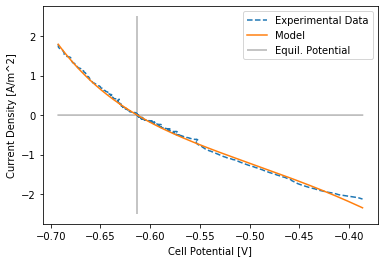

In [22]:
# paramys = [0.05151305, 0.37046147, 0.37045137]
paramys =j0_fit, aa_fit, ac_fit
# paramys = [5.27220332e-02, 8.16570098e-02, 4.85197831e-02]
# paramys =[(1.08614495e-05), 2.19024473e-01, 8.93331622e-01]
# paramys = [-.01,.4,.5]
print('j0: {:.2f}, aa: {:.3f}, ac: {:.3f}'.format(*paramys))
j_fits = BV(np.array(use_V),*paramys) #AMPS/m^2
# plt.plot(np.array(use_v)-0.544,np.zeros_like(use_v),'k',alpha=0.3)
plt.vlines(equil_potential,-2.5,2.5, alpha=0.3, label='Equil. Potential')
plt.plot(use_V,np.zeros_like(use_V),'k',alpha=0.3)
plt.plot(np.array(use_V),use_current_densities, '--',label='Experimental Data')
# plt.plot(np.array(use_V),np.array(use_I), '--',label='Experimental Data')
plt.plot(np.array(use_V),j_fits,label='Model')
plt.ylabel('Current Density [A/m^2]')
# plt.ylabel('Current [mA]')
plt.xlabel('Cell Potential [V]')
# plt.xlim(.1,1.25)
# plt.ylim(-.1,.1)
plt.legend()
plt.show()
# plt.savefig('model_vs_data.png',dpi=100)

# fig, ax1 = plt.subplots()

# color = 'tab:red'
# ax1.set_xlabel('voltage')
# ax1.set_ylabel('data I', color=color)
# ax1.plot(use_v,use_current_densities, '--',color=color)
# # ax1.plot(times,Power_demands, '*',color='tab:grey',label = 'Power Demand (kW)')
# ax1.tick_params(axis='y', labelcolor=color)
# # plt.legend(loc = 'upper center')

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('model I', color=color)  # we already handled the x-label with ax1
# ax2.plot(use_v, j_fits, '-',color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped

# plt.show()